# Gráficos Op Systs Matrix Plants

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# import bibliotecas

In [3]:
minha_matriz= pd.read_csv('plant_rnkg.csv')
minha_matriz.head(5)

,Country,Name,SAP ID,Total,Complexity,Ebitda,Effort,Tier
0,United States,Chicago,L030,0.7375,0.320,0.25,0.1675,1
1,United States,Tabler Station,L090,0.7050,0.290,0.25,0.1650,1
2,United States,Litiz,Litiz,0.6700,0.255,0.25,0.1650,1
3,United States,Hazelton,L100,0.6450,0.320,0.20,0.1250,1
4,United States,Lima,L130,0.6250,0.210,0.25,0.1650,1


Add color per Tier for later graph and continent, verify if all is correct

In [6]:
len(minha_matriz.columns)
America=['United States','Brasil','Canada','Mexico']
Asia=['Vietnam']
Continent=[]
Color_Tier=[]
for plant in minha_matriz['Country']:
    if plant in America:
        Continent.append('America')
    elif plant in Asia :
        Continent.append('Asia')
    else:
        Continent.append('Europe')

for plant in minha_matriz['Tier']:
    if plant==1:
        Color_Tier.append('r')
    elif plant==2:
        Color_Tier.append('b')
    else:
        Color_Tier.append('gray')
minha_matriz['Continent']=Continent
minha_matriz['Color_Tier']=Color_Tier

minha_matriz.head(5)

,Country,Name,SAP ID,Total,Complexity,Ebitda,Effort,Tier,Continent,Color_Tier
0,United States,Chicago,L030,0.7375,0.320,0.25,0.1675,1,America,r
1,United States,Tabler Station,L090,0.7050,0.290,0.25,0.1650,1,America,r
2,United States,Litiz,Litiz,0.6700,0.255,0.25,0.1650,1,America,r
3,United States,Hazelton,L100,0.6450,0.320,0.20,0.1250,1,America,r
4,United States,Lima,L130,0.6250,0.210,0.25,0.1650,1,America,r


Sort values and split DF


In [12]:
minha_matriz.sort_values(['Total'],ascending=False, inplace=True)

minha_matriz.reset_index(drop=True, inplace=True)

Tier1=minha_matriz.loc[minha_matriz['Tier'] == 1]
Tier1.reset_index(drop=True, inplace=True)
                  
Tier2=minha_matriz.loc[minha_matriz['Tier'] == 2]
Tier2.reset_index(drop=True, inplace=True)

Tier2

,Country,Name,SAP ID,Total,Complexity,Ebitda,Effort,Tier,Continent,Color_Tier
0,Netherland,Zoetermeer,H011,0.4125,0.195,0.05,0.1675,2,Europe,b
1,Portugal,S. Iria,B060,0.3550,0.250,0.00,0.1050,2,Europe,b
2,Canada,Edmonton,K011,0.3450,0.205,0.10,0.0400,2,America,b
3,Italy,Pomezia,F010,0.3200,0.250,0.05,0.0200,2,Europe,b
4,Mexico,Mexico - San Luis,M920,0.3050,0.205,0.10,0.0000,2,America,b
5,Brasil,Araras Ambev,G090,0.3050,0.205,0.10,0.0000,2,America,b
6,Vietnam,Vietnam,V010,0.3000,0.250,0.05,0.0000,2,Asia,b
7,England,Thurrock,D120,0.2950,0.205,0.05,0.0400,2,Europe,b


# Plotting Tier 1 graph

([<matplotlib.axis.XTick at 0x1f25bfc84f0>,
 [Text(0, 0, '-'), Text(0, 0, '+')])

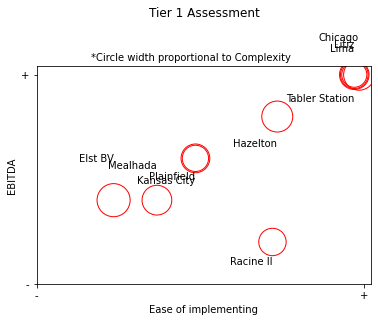

In [26]:
x=Tier1['Effort']
y=Tier1['Ebitda']
z=Tier1['Complexity']*3000
z1=Tier1['Complexity']
names=Tier1['Name']
tier_color=Tier1['Color_Tier']

for i in range(0,len(x),2):
    plt.scatter(x[i],y[i],z[i], marker='o', facecolors='none', edgecolors=tier_color[i])
    plt.annotate(names[i],xy=(x[i],y[i]), xytext =(0,z1[i]*100),textcoords = 'offset points', ha= 'right', va = 'bottom')
    
for i in range(1,len(x),2):
    plt.scatter(x[i],y[i],z[i], marker='o', facecolors='none', edgecolors=tier_color[i])
    plt.annotate(names[i],xy=(x[i],y[i]), xytext =(0,-z1[i]*100),textcoords = 'offset points', ha= 'right', va = 'bottom')

plt.title('Tier 1 Assessment',y=1.2)
plt.figtext(0.25,0.9,'*Circle width proportional to Complexity')
plt.xlabel('Ease of implementing')
plt.ylabel('EBITDA')
plt.yticks([0,0.25],['-','+'])
plt.xticks([0,0.17],['-','+'])
#for i in range(0,9,2):
    #plt.annotate(names[i],xy=(x[i],y[i]), xytext =(0,z1[i]*100),textcoords = 'offset points', ha= 'right', va = 'bottom')
    
#for i in range(1,10,2):
    #plt.annotate(names[i],xy=(x[i],y[i]), xytext =(0,-z1[i]*100),textcoords = 'offset points', ha= 'right', va = 'bottom')

Plotting all plants graph

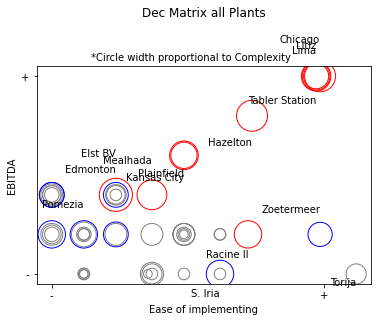

In [45]:
x0=minha_matriz['Effort']
y0=minha_matriz['Ebitda']
z0=minha_matriz['Complexity']*3000
z10=minha_matriz['Complexity']
names0=minha_matriz['Name']
tier_color0=minha_matriz['Color_Tier']

for i in range(0,len(x0),2):
    plt.scatter(x0[i],y0[i],z0[i], marker='o', facecolors='none', edgecolors=tier_color0[i])
    #plt.annotate(names[i],xy=(x[i],y[i]), xytext =(0,z1[i]*100),textcoords = 'offset points', ha= 'right', va = 'bottom')
    
for i in range(1,len(x0),2):
    plt.scatter(x0[i],y0[i],z0[i], marker='o', facecolors='none', edgecolors=tier_color0[i])
    #plt.annotate(names[i],xy=(x[i],y[i]), xytext =(0,-z1[i]*100),textcoords = 'offset points', ha= 'right', va = 'bottom')

plt.title('Dec Matrix all Plants',y=1.2)
plt.figtext(0.25,0.9,'*Circle width proportional to Complexity')
plt.xlabel('Ease of implementing')
plt.ylabel('EBITDA')
plt.yticks([0,0.25],['-','+'])
plt.xticks([0,0.17],['-','+'])

for i in range(0,15,2):
    plt.annotate(names0[i],xy=(x0[i],y0[i]), xytext =(0,z10[i]*100),textcoords = 'offset points', ha= 'right', va = 'bottom')

for i in range(1,15,2):
    plt.annotate(names0[i],xy=(x0[i],y0[i]), xytext =(0,-z10[i]*100),textcoords = 'offset points', ha= 'right', va = 'bottom')

([<matplotlib.axis.XTick at 0x1f25bda4d30>,
 [Text(0, 0, '-'), Text(0, 0, '+')])

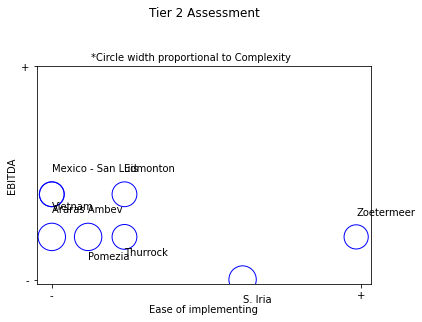

In [41]:
x00=Tier2['Effort']
y00=Tier2['Ebitda']
z00=Tier2['Complexity']*3000
z100=Tier2['Complexity']
names00=Tier2['Name']
tier_color00=Tier2['Color_Tier']

for i in range(0,len(x00),2):
    plt.scatter(x00[i],y00[i],z00[i], marker='o', facecolors='none', edgecolors=tier_color00[i])
    plt.annotate(names00[i],xy=(x00[i],y00[i]), xytext =(0,z100[i]*100),textcoords = 'offset points', ha= 'left', va = 'bottom')
    
for i in range(1,len(x00),2):
    plt.scatter(x00[i],y00[i],z00[i], marker='o', facecolors='none', edgecolors=tier_color00[i])
    plt.annotate(names00[i],xy=(x00[i],y00[i]), xytext =(0,-z100[i]*100),textcoords = 'offset points', ha= 'left', va = 'bottom')

plt.title('Tier 2 Assessment',y=1.2)
plt.figtext(0.25,0.9,'*Circle width proportional to Complexity')
plt.xlabel('Ease of implementing')
plt.ylabel('EBITDA')
plt.yticks([0,0.25],['-','+'])
plt.xticks([0,0.17],['-','+'])